In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import auc, roc_curve
from sklearn.decomposition import PCA

In [14]:
df_wine = pd.read_csv('D:\my_dateset\wine.csv')
le = LabelEncoder()
df_wine['type'] = le.fit_transform(df_wine['type'])
le.classes_
le.transform(le.classes_)
dict(zip(le.classes_, le.transform(le.classes_)))
df_wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
df_wine.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,1,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,1,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,1,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,1,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
6496,1,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


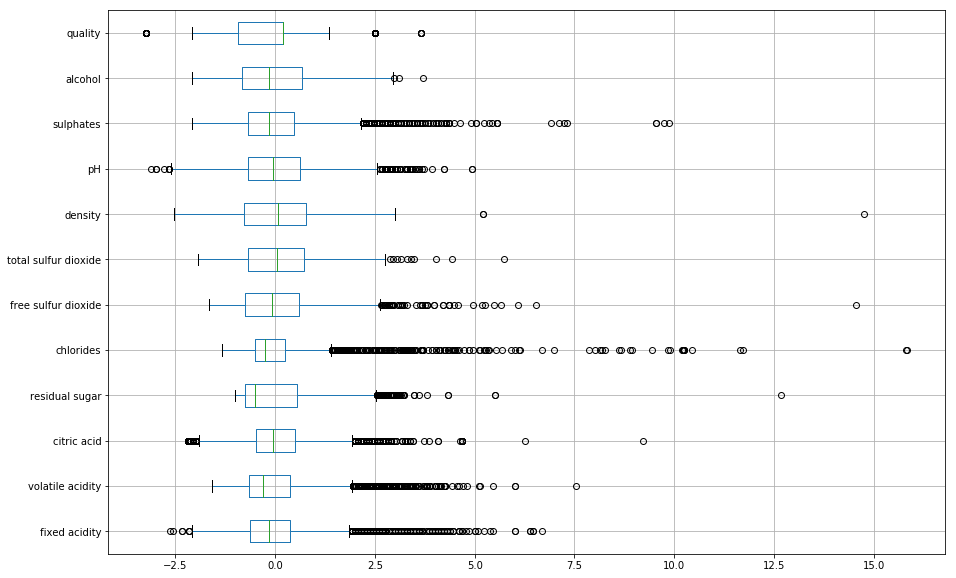

In [16]:
x=df_wine.drop(['type'],axis=1)
sc=StandardScaler().fit(x)
df_wine_sc=pd.DataFrame(sc.transform(x),columns=x.columns) 
df_wine_sc.boxplot(vert=False,figsize=(15,10))


In [17]:
pca=PCA(n_components=12)
pc=pca.fit_transform(df_wine_sc)
pc1=pd.DataFrame(data=pc,columns = ['comp1', 'comp2','comp3', 'comp4','comp5', 'comp6','comp7', 'comp8','comp9', 'comp10','comp11', 'comp12',])
df_wine_pc=pd.concat([pc1,df_wine[['type']]],axis=1)
df_wine_pc.head(2)

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9,comp10,comp11,comp12,type
0,-3.348438,0.568926,-2.727386,-0.223777,0.621408,-0.231602,0.124851,-0.000515,-0.646268,-0.069141,-0.104249,0.027643,0
1,-3.228595,1.197335,-1.998904,-0.377154,0.110313,1.945885,0.938413,0.425532,-0.114802,-0.449160,-0.258251,-0.014469,0


In [18]:
pca.explained_variance_ratio_

array([0.25346226, 0.22082117, 0.13679223, 0.0890521 , 0.07004171,
       0.05503326, 0.04698554, 0.04299857, 0.03819769, 0.02491774,
       0.01896563, 0.0027321 ])

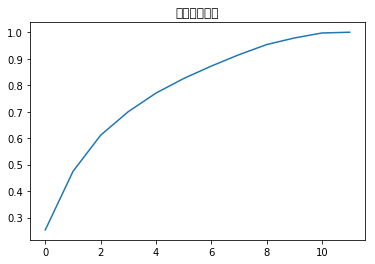

In [19]:
z=pca.explained_variance_ratio_.cumsum()
plt.plot(z)
plt.title('累积方差比例')
plt.show()

### PCA N=8

In [20]:
pca1=PCA(n_components=8)
pc2=pca1.fit_transform(df_wine_sc)
pc3=pd.DataFrame(data=pc2,columns = ['comp1', 'comp2','comp3', 'comp4','comp5', 'comp6','comp7', 'comp8'])
pc3 #转换为表格
df_wine_pc8=pd.concat([pc3,df_wine['type']],axis=1)
df_wine_pc8.head(2)

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,type
0,-3.348438,0.568926,-2.727386,-0.223777,0.621408,-0.231602,0.124851,-0.000515,0
1,-3.228595,1.197335,-1.998904,-0.377154,0.110313,1.945885,0.938413,0.425532,0


# 逻辑回归模型预测

In [21]:
X=pc3
Y=df_wine['type']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((5197, 8), (1300, 8))

In [23]:
LR1 = LogisticRegression()
LR1.fit(X_train, Y_train)
y1_predict = LR1.predict(X_test)
y1_acc = accuracy_score(Y_test,y1_predict)
print(y1_acc)
y1_cm=confusion_matrix(Y_test,y1_predict)
print(y1_cm)
y1_cr=classification_report(Y_test,y1_predict)
print(y1_cr)

0.9869230769230769
[[305   6]
 [ 11 978]]
             precision    recall  f1-score   support

          0       0.97      0.98      0.97       311
          1       0.99      0.99      0.99       989

avg / total       0.99      0.99      0.99      1300



# ROC曲线 AUC

In [24]:
#每个样例属于正类的概率值
Y_pred_prob =LR1.predict_proba(X_test)
#计算ROC曲线，既真正例率、假正率等
fpr,tpr,thresholds = roc_curve(Y_test,Y_pred_prob[:,1])
#计算AUC值
auc1=auc(fpr,tpr)
print(auc1)

0.9979159825605779


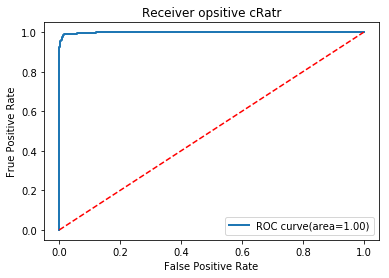

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
 
plt.plot(fpr,tpr,lw=2,label='ROC curve(area={:.2f})'.format(auc1))
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('Frue Positive Rate')
plt.title('Receiver opsitive cRatr')
plt.legend(loc='lower right')
#AUC用得比较多的一个重要原因是，实际环境中正负样本极不均衡，PR曲线无法很好反映出分类器性能，而ROC受此影响小。

### 网格化调超参

In [26]:
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=LogisticRegression(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_lr.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [27]:
clf_lr.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [28]:
clf_lr.best_score_

0.9874927842986339

In [29]:
clf_lr.grid_scores_

[mean: 0.90071, std: 0.01091, params: {'C': 0.001, 'penalty': 'l1'},
 mean: 0.98037, std: 0.00470, params: {'C': 0.001, 'penalty': 'l2'},
 mean: 0.98441, std: 0.00567, params: {'C': 0.01, 'penalty': 'l1'},
 mean: 0.98692, std: 0.00420, params: {'C': 0.01, 'penalty': 'l2'},
 mean: 0.98749, std: 0.00441, params: {'C': 0.1, 'penalty': 'l1'},
 mean: 0.98730, std: 0.00473, params: {'C': 0.1, 'penalty': 'l2'},
 mean: 0.98653, std: 0.00502, params: {'C': 1, 'penalty': 'l1'},
 mean: 0.98672, std: 0.00451, params: {'C': 1, 'penalty': 'l2'},
 mean: 0.98595, std: 0.00480, params: {'C': 10, 'penalty': 'l1'},
 mean: 0.98595, std: 0.00480, params: {'C': 10, 'penalty': 'l2'},
 mean: 0.98595, std: 0.00480, params: {'C': 100, 'penalty': 'l1'},
 mean: 0.98595, std: 0.00480, params: {'C': 100, 'penalty': 'l2'},
 mean: 0.98595, std: 0.00480, params: {'C': 1000, 'penalty': 'l1'},
 mean: 0.98595, std: 0.00480, params: {'C': 1000, 'penalty': 'l2'}]

In [30]:
pred=clf_lr.predict(X_test)
accuracy_score(pred,Y_test)

0.9907692307692307

# 没有PCA进行分析的逻辑回归模型

In [31]:
a=df_wine_sc
b=df_wine['type']


In [32]:
x_train, x_test, y_train, y_test = train_test_split(a, b, test_size=0.2, random_state=0)
x_train.shape, x_test.shape

((5197, 12), (1300, 12))

In [33]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [35]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # 设置marker generator和color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # 画出决策区域
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim = (xx2.min(), xx2.max())
    # 画出所有样本
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):  # np.unique:去除重复数据
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
    # 标出需测试的样本
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='black', alpha=0.8, linewidths=1, marker='o', s=10, label='test set')

In [36]:
pca = PCA(n_components=2)

In [38]:
pca.transform(X_train_std)
pca.explained_variance_ratio_

NotFittedError: This PCA instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

<bound method _BasePCA.transform of PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)>

In [ ]:
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

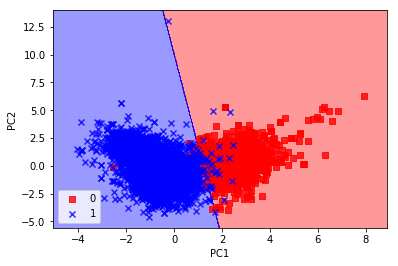

In [ ]:
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [ ]:
y_pred=lr.predict(X_test_pca)
accuracy_score(y_test,y_pred)

0.48438228438228437

In [ ]:
confusion_matrix(y_test,y_pred)

array([[   2,  555],
       [ 551, 1037]], dtype=int64)